<a href="https://colab.research.google.com/github/MayurJadhav123/DiabetesPrediction/blob/main/CNN_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-01-03 05:21:07--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.08s   

2023-01-03 05:21:08 (58.6 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [ ]:
df= pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df['targets'] = df['labels'].astype("category").cat.codes

In [ ]:
#no of classes
K = df['targets'].max() + 1
K

5

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [ ]:
#Convert Sentences to Sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [ ]:
#get word index mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' %V)

Found 27801 unique tokens.


In [ ]:
#pad sequences so that we get a N X T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#get sequence length
T = data_train.shape[1]
T

Shape of data train tensor: (1557, 3475)


3475

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 3475)


In [ ]:
#Create the model

#We get to choose embedding dimensionality
D = 50

#Note: We actually want to the size of the embedding to (V+1) X D,
#Because first index starts from 1 not 0
#Thus, the final index of the embedding matrix is V
#Then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
#x = MaxPooling1D(3)(x)
#x = Conv1D(64, 3, activation='relu')(x)
#x = MaxPooling1D(3)(x)
#x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [ ]:
#Compile and fit
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs = 50,
  validation_data = (data_test, df_test['targets'])
)


Training model...
Epoch 1/50
49/49 [==============================] - 17s 324ms/step - loss: 1.5698 - accuracy: 0.4001 - val_loss: 1.4941 - val_accuracy: 0.6003
Epoch 2/50
49/49 [==============================] - 16s 328ms/step - loss: 1.3526 - accuracy: 0.7347 - val_loss: 1.1823 - val_accuracy: 0.8054
Epoch 3/50
49/49 [==============================] - 10s 205ms/step - loss: 0.9063 - accuracy: 0.8812 - val_loss: 0.6919 - val_accuracy: 0.8892
Epoch 4/50
49/49 [==============================] - 10s 205ms/step - loss: 0.4746 - accuracy: 0.9216 - val_loss: 0.4128 - val_accuracy: 0.9042
Epoch 5/50
49/49 [==============================] - 10s 203ms/step - loss: 0.2670 - accuracy: 0.9499 - val_loss: 0.3001 - val_accuracy: 0.9222
Epoch 6/50
49/49 [==============================] - 10s 209ms/step - loss: 0.1694 - accuracy: 0.9750 - val_loss: 0.2481 - val_accuracy: 0.9386
Epoch 7/50
49/49 [==============================] - 10s 206ms/step - loss: 0.1152 - accuracy: 0.9827 - val_loss: 0.2186 - va

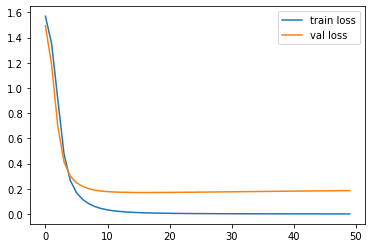

In [ ]:
#Plot loss per iteration
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend();

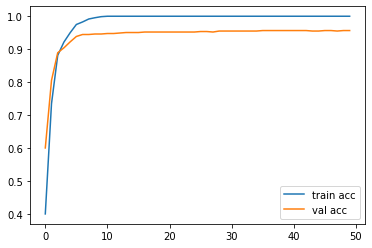

In [ ]:
#Plot loss per iteration
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend();